In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb

from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder as TE

import os
import datetime

mp.style.use('fivethirtyeight')

In [2]:
def read_data(old_csvs, new_csv):
    if os.path.exists(new_csv):
        df = pd.read_csv(new_csv)
        return df
    else:
        dfs = []
        for csv in old_csvs:
            dfs.append(pd.read_csv(csv))
        return dfs

def write_csv(new_csv, new_df):
    new_df.to_csv(new_csv)

In [3]:
p1 = "Clean_Dataset.csv"
p2 = "business.csv"
p3 = "economy.csv"

new_csv = "My_Clean_Dataset.csv"

old_csvs = [p1, p2, p3]
# cd_df, buss_df, eco_df = read_data(old_csvs, new_csv)

clean_created_df = read_data(old_csvs, new_csv)

In [4]:
new_csv_df.head()

,Unnamed: 0,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,flight,dep_time_enc,arr_time_enc,stops
0,0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,0,SG-8709,Evening,Night,0
1,1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,0,SG-8157,Early Morning,Morning,0
2,2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,0,I5-764,Ungodly Hour,Early Morning,0
3,3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,0,UK-995,Morning,Morning,0
4,4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,0,UK-963,Morning,Morning,0


In [65]:
write_csv(new_csv, clean_created_df)

In [2]:
cd_df = pd.read_csv("Clean_Dataset.csv")
cd_df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
buss_df = pd.read_csv("business.csv")
buss_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [4]:
eco_df = pd.read_csv("economy.csv")
eco_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


* Airline encoding  &rarr; Target Encoding
* Combining codes and encoding
* Location stats 
    * Unique locs
    * Total arrivals and departures
    * Mean price to each and from loc
    * Flight distribution based on locs
* Departure time and arrival time encoding
* Number of stops based on to and from locs (if feasible)
* Number of stops based on airline type
* Price distributions based on airlines, to and from locs, arrival and departure time encoding
* Time taken based on airlines, to and from locs
* Monthly distributions of flights, based on airlines, to and from locs, arrival and departure time encoding
* Yearly distributions of flights, based on airlines, to and from locs, arrival and departure time encoding (if feasible)

In [5]:
eco_df['airline'].value_counts()

Vistara      67270
Air India    47996
Indigo       43120
GO FIRST     23177
AirAsia      16098
SpiceJet      9011
StarAir         61
Trujet          41
Name: airline, dtype: int64

In [6]:
buss_df['airline'].value_counts()

Vistara      60589
Air India    32898
Name: airline, dtype: int64

In [7]:
buss_df["class"] = 1
eco_df["class"] = 0

In [8]:
clean_created_df = pd.concat([eco_df, buss_df], axis=0)
print(clean_created_df.shape)
clean_created_df.head()

(300261, 12)


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",0
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",0
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",0
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",0
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",0


In [9]:
clean_created_df.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
class         0
dtype: int64

In [10]:
clean_created_df.describe()

,num_code,class
count,300261.000000,300261.000000
mean,1417.771709,0.311352
std,1974.514439,0.463047
min,101.000000,0.000000
25%,637.000000,0.000000
50%,818.000000,0.000000
75%,927.000000,1.000000
max,9991.000000,1.000000


In [11]:
clean_created_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300261 entries, 0 to 93486
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  price       300261 non-null  object
 11  class       300261 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 29.8+ MB


[AV - Categorical Data Encoding](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/)

[Medium - Too many Categories](https://annahava.medium.com/too-many-categories-how-to-deal-with-categorical-features-of-high-cardinality-d4563cfe62d6)

In [12]:
clean_created_df["price"] = clean_created_df["price"].str.replace(',', '').astype('int')

In [13]:
encoder = TE(cols='airline')
encoded_airlines = encoder.fit_transform(clean_created_df['airline'], clean_created_df['price'])
encoded_airlines

,airline
0,6179.278881
1,6179.278881
2,4091.072742
3,30396.536302
4,30396.536302
...,...
93482,30396.536302
93483,30396.536302
93484,30396.536302
93485,30396.536302


In [14]:
clean_created_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,0
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,0
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,0
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,0
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,0


In [15]:
clean_created_df['flight'] = clean_created_df['ch_code'] + '-' + clean_created_df['num_code'].astype('str')
clean_created_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,flight
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,0,SG-8709
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,0,SG-8157
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,0,I5-764
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,0,UK-995
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,0,UK-963


* Airline encoding  &rarr; Target Encoding ✅
* Combining codes and encoding ✅
* Location stats 
    * Unique locs ✅
    * Total arrivals and departures ✅
    * Mean price to each and from loc &rarr; groupby and min,avg, max price ✅
    * Flight distribution based on locs &rarr; grid of graphs for to and from vs filght company ✅ - add annotations over bars
* Departure time and arrival time encoding ✅
* Number of stops based on to and from locs (if feasible) ✅
* Number of stops based on airline type ✅ - Fill in the missing values and add annotations over bars
* Price distributions based on airlines, to and from locs, arrival and departure time encoding
* Time taken based on airlines, to and from locs
* Monthly distributions of flights, based on airlines, to and from locs, arrival and departure time encoding
* Yearly distributions of flights, based on airlines, to and from locs, arrival and departure time encoding (if feasible)
* Think what more can be done
* If cannot think of anything visit kaggle, download notebooks and learn more, implement more.
* Add analysis information for current level of analysis
* ML
* Refactor the code
* Add analysis information for remaning notebook
* Submission

In [16]:
clean_created_df[['from', 'to']].value_counts()

from       to       
Delhi      Mumbai       15291
Mumbai     Delhi        14809
Delhi      Bangalore    14012
Bangalore  Delhi        13756
           Mumbai       12940
Mumbai     Bangalore    12885
           Kolkata      12602
Delhi      Kolkata      11934
Kolkata    Mumbai       11467
Delhi      Chennai      10780
Kolkata    Delhi        10506
Mumbai     Hyderabad    10477
           Chennai      10130
Hyderabad  Mumbai       10073
Bangalore  Kolkata      10029
Kolkata    Bangalore     9824
Chennai    Delhi         9783
           Mumbai        9338
Delhi      Hyderabad     9328
Bangalore  Hyderabad     8971
Hyderabad  Delhi         8507
           Kolkata       7987
           Bangalore     7898
Kolkata    Hyderabad     7897
Chennai    Kolkata       6983
Kolkata    Chennai       6653
Chennai    Bangalore     6493
Bangalore  Chennai       6410
Hyderabad  Chennai       6395
Chennai    Hyderabad     6103
dtype: int64

In [17]:
clean_created_df['from'].value_counts()

Delhi        61345
Mumbai       60903
Bangalore    52106
Kolkata      46347
Hyderabad    40860
Chennai      38700
Name: from, dtype: int64

In [18]:
clean_created_df['to'].value_counts()

Mumbai       59109
Delhi        57361
Bangalore    51112
Kolkata      49535
Hyderabad    42776
Chennai      40368
Name: to, dtype: int64

In [19]:
print(61345 + 60903 + 52106 + 46347 + 40860 + 38700)
print(59109 + 57361 + 51112 + 49535 + 42776 + 40368)

300261
300261


In [20]:
to_mumbai = clean_created_df[clean_created_df['to'] == "Kolkata"]
to_mumbai["from"].value_counts()

Mumbai       12602
Delhi        11934
Bangalore    10029
Hyderabad     7987
Chennai       6983
Name: from, dtype: int64

In [21]:
clean_created_df.groupby(['from', 'to']).agg(
    Mean=('price', np.mean),
    Max = ('price', np.max),
    Min = ('price', np.min)).round(2)

# .mean()['price']

Mean     Max   Min
from      to                               
Bangalore Chennai    23321.85   90720  1603
          Delhi      17723.31  111883  2723
          Hyderabad  21152.05   83239  1694
          Kolkata    23498.23  105168  3026
          Mumbai     23127.23  103819  2150
Chennai   Bangalore  25081.85  107597  1443
          Delhi      18981.86  103683  2051
          Hyderabad  21591.35   92752  1105
          Kolkata    22669.93  104624  2359
          Mumbai     22765.85  114704  1830
Delhi     Bangalore  17880.22   85353  3090
          Chennai    19369.88  104466  1998
          Hyderabad  17347.29  114507  2022
          Kolkata    20566.41  117307  2480
          Mumbai     19354.41   95657  2281
Hyderabad Bangalore  21245.95   97767  1755
          Chennai    21848.07   95208  1543
          Delhi      17242.64   86203  2200
          Kolkata    20823.89   97381  2056
          Mumbai     20065.72  115211  2250
Kolkata   Bangalore  22744.81  105638  3465
          Chennai    23660.36   95183  2966
          Delhi      19422.35  123071  2994
          Hyderabad  21500.01  114705  2436
          Mumbai     22078.88  110936  3379
Mumbai    Bangalore  23147.87  114523  2074
          Chennai    22781.90  111964  1890
          Delhi      18725.32  111437  2336
          Hyderabad  20992.13   99677  2105
          Kolkata    22379.15  100909  2835

In [22]:
clean_ariline_group = clean_created_df.groupby(['from', 'to', 'airline']).count()['ch_code']

In [23]:
clean_ariline_group

from       to       airline  
Bangalore  Chennai  Air India    1610
                    AirAsia       138
                    GO FIRST      369
                    Indigo        282
                    SpiceJet       58
                                 ... 
Mumbai     Kolkata  AirAsia       463
                    GO FIRST     1150
                    Indigo       1690
                    SpiceJet      973
                    Vistara      4848
Name: ch_code, Length: 183, dtype: int64

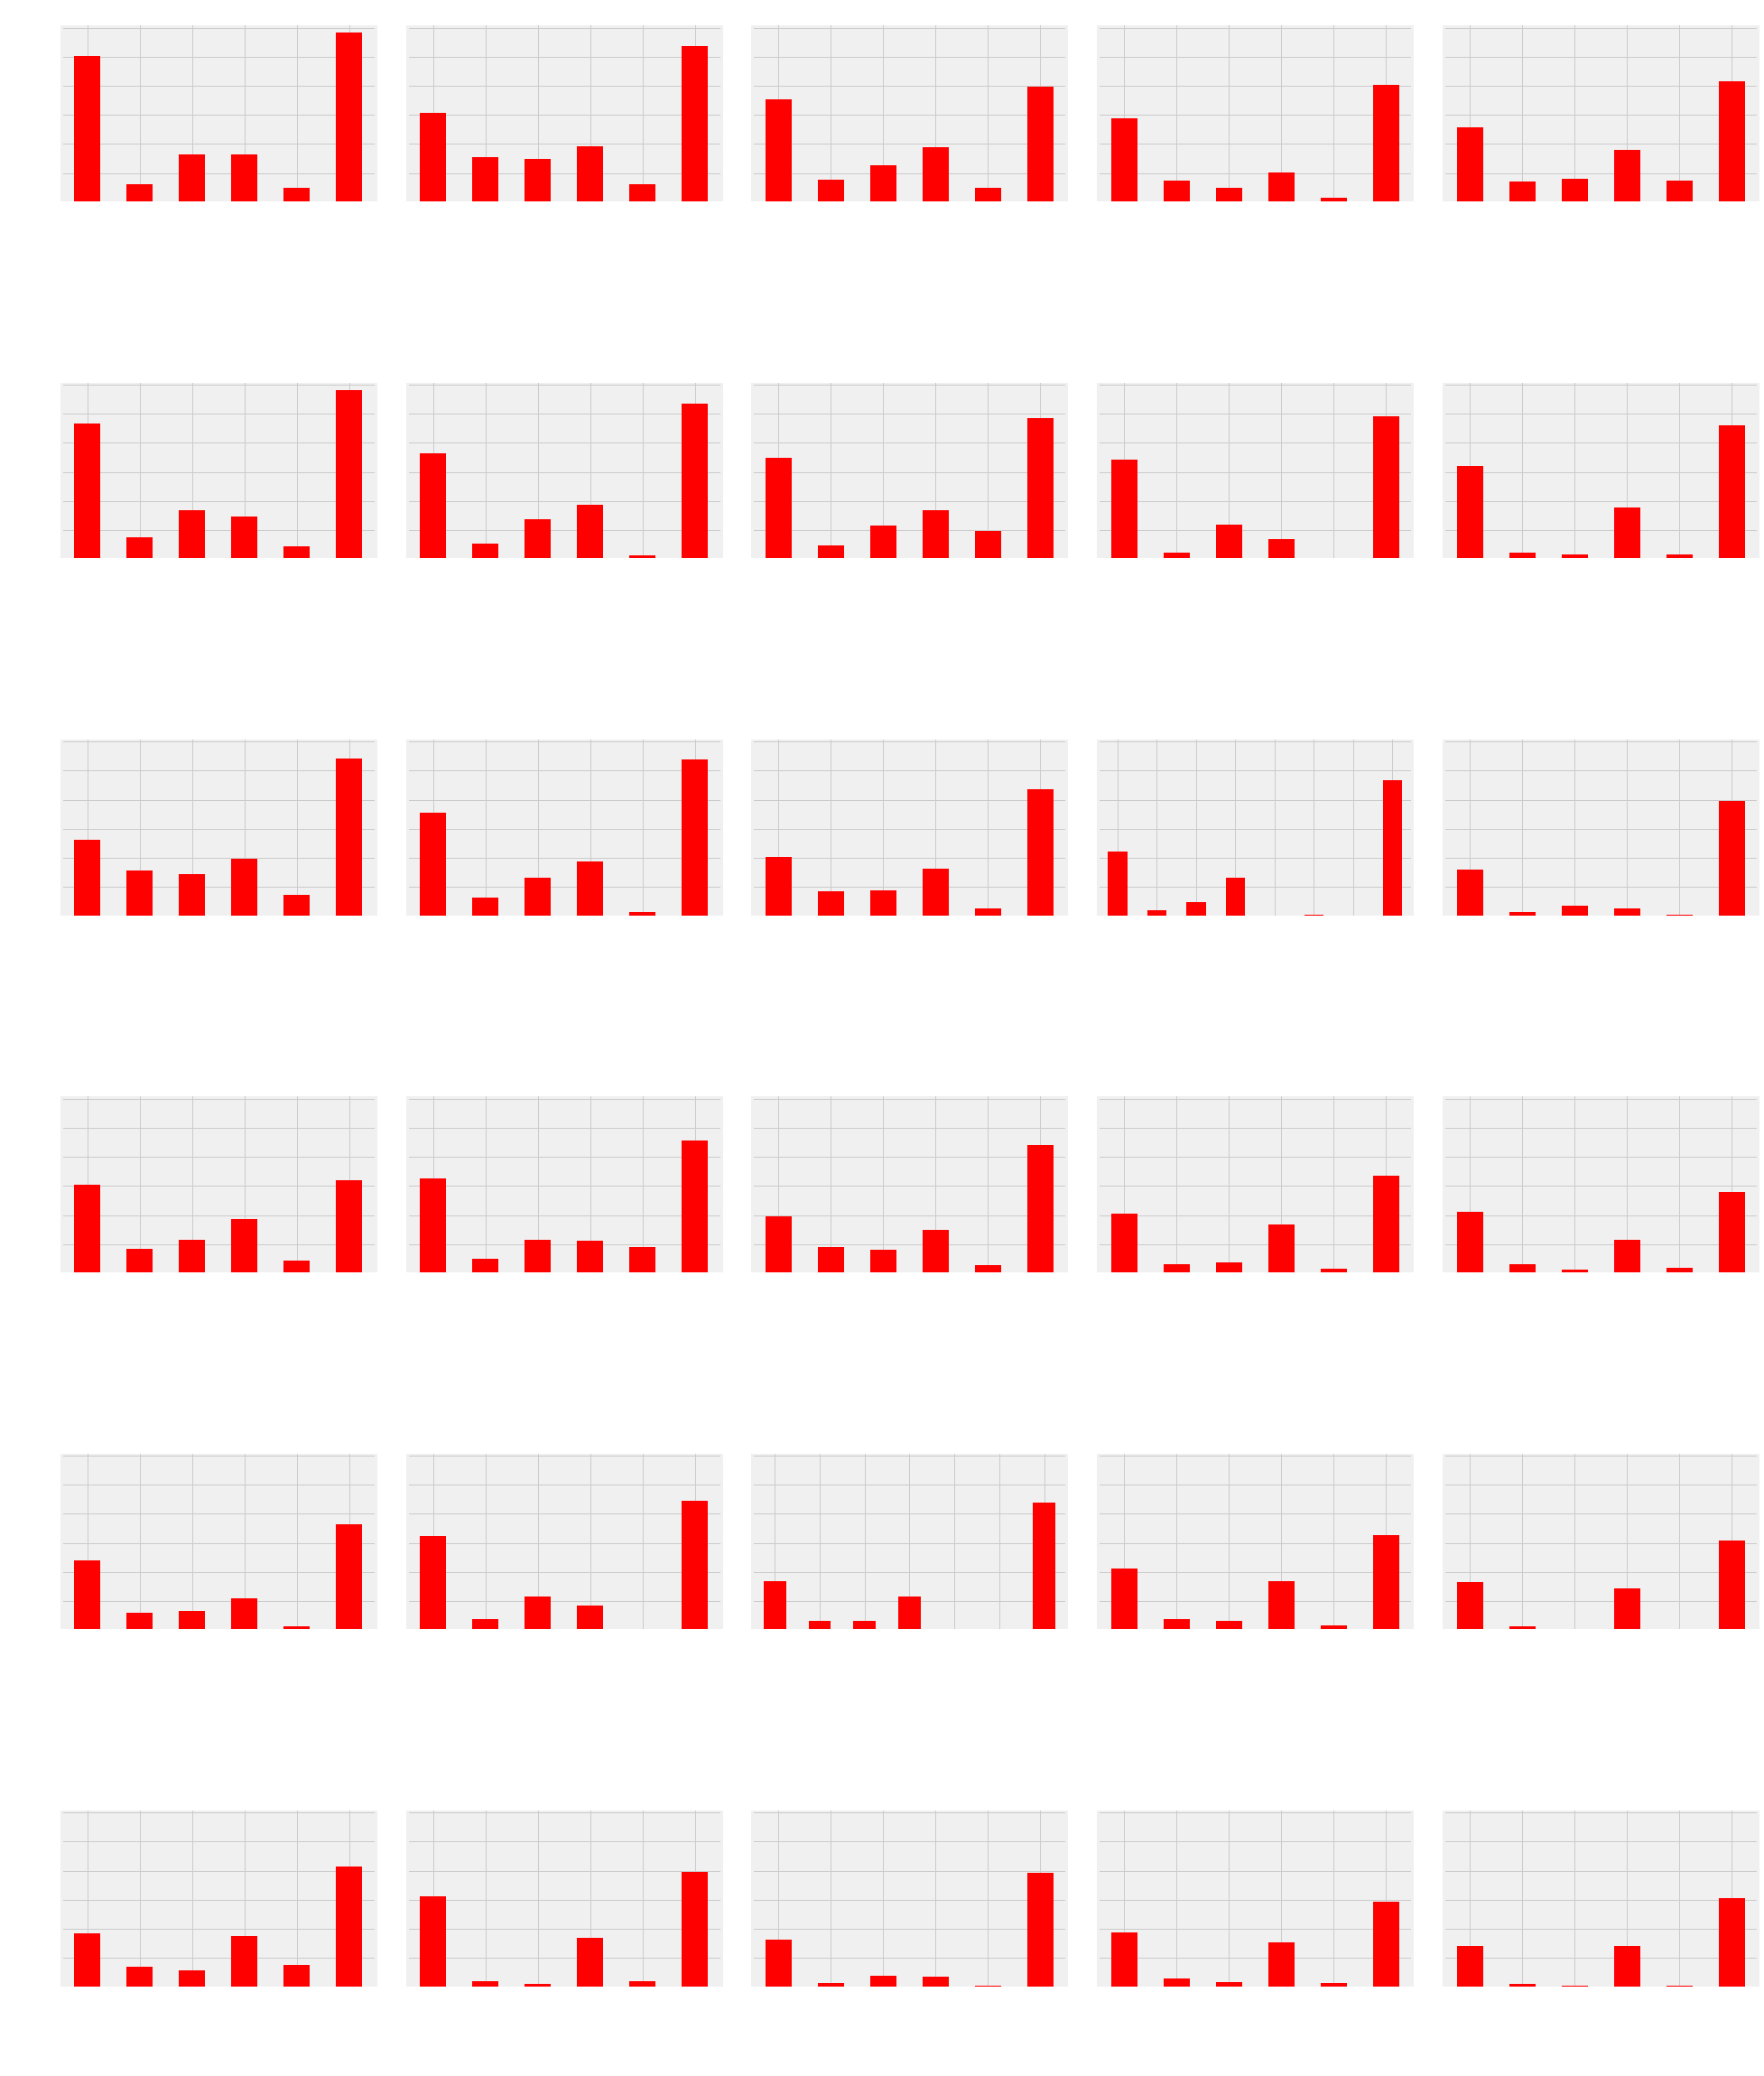

In [41]:
COLOR = 'white'
mp.rcParams['text.color'] = COLOR

font = {'size' : 14}
mp.rc('font', **font)

nrows, ncols = 6, 5
cities = clean_created_df['from'].unique()

fig, axes = mp.subplots(nrows=nrows, ncols=ncols, figsize=(30, 40), sharey=True)
a_row, a_col = 0, 0
mp.subplots_adjust(wspace=0.1, hspace=1)

for i in range(len(cities)):
    for j in range(len(cities)):
        if i == j:
            continue
        ax = axes[a_row][a_col]
        clean_ariline_group[cities[i]][cities[j]].plot(kind='bar', color='red', ax= ax)
        ax.set_title(cities[j], fontstyle='italic', fontsize=18)
        ax.set_ylabel(cities[i], fontstyle='italic', fontsize=18)
        ax.xaxis.label.set_color('white')
        ax.yaxis.label.set_color('white')

        ax.spines['bottom'].set_color('white')
        ax.spines['top'].set_color('white')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        
        a_col += 1
    a_row += 1
    a_col = 0


## Departure time and arrival time encoding

* 4 - 7 : Early Morning
* 7 - 12: Morning
* 12 - 16:Afternoon
* 16 - 20 : Evening
* 20 - 0: Night
* 12 -2 : Late Night
* 2 - 4 : UnGodly Hour

In [27]:
clean_created_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,flight
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,0,SG-8709
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,0,SG-8157
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,0,I5-764
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,0,UK-995
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,0,UK-963


In [28]:
def time_encoding(hr):
    if 0 < hr <= 2:
        return "Late Night"
    elif 2 < hr <= 4:
        return "Ungodly Hour"
    elif 4 < hr <= 7:
        return "Early Morning"
    elif 7 < hr <= 12:
        return "Morning"
    elif 12 < hr <= 16:
        return "Afternoon"
    elif 16 < hr <= 19:
        return "Evening"
    elif 19 < hr <= 23:
        return "Night"

In [53]:
clean_created_df['dep_time_time'] = pd.to_datetime(clean_created_df['dep_time'], format='%H:%M')
clean_created_df['arr_time_time'] = pd.to_datetime(clean_created_df['arr_time'], format='%H:%M')

clean_created_df["dep_time_enc"] = clean_created_df["dep_time_time"].dt.hour.apply(time_encoding)
clean_created_df["arr_time_enc"] = clean_created_df["arr_time_time"].dt.hour.apply(time_encoding)

clean_created_df.drop(columns=["dep_time_time", "arr_time_time"], inplace=True)

clean_created_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,flight,dep_time_enc,arr_time_enc
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,0,SG-8709,Evening,Night
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,0,SG-8157,Early Morning,Morning
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,0,I5-764,Ungodly Hour,Early Morning
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,0,UK-995,Morning,Morning
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,0,UK-963,Morning,Morning


Number of stops based on to and from locs (if feasible)

In [14]:
def get_stops(row):
    if row[0] == "n":
        return '0'
    else:
        return row[0]

clean_created_df["stops_str"] = clean_created_df["stop"].apply(get_stops)
clean_created_df.head()

,Unnamed: 0,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,flight,dep_time_enc,arr_time_enc,stops,stops_str
0,0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,0,SG-8709,Evening,Night,0,0
1,1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,0,SG-8157,Early Morning,Morning,0,0
2,2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,0,I5-764,Ungodly Hour,Early Morning,0,0
3,3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,0,UK-995,Morning,Morning,0,0
4,4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,0,UK-963,Morning,Morning,0,0


In [15]:
clean_created_df[['stop', 'stops', 'stops_str']].value_counts()

stop                                                                          stops  stops_str
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t                    1      1            243603
non-stop                                                                      0      0             36044
2+-stop                                                                       2      2             13288
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t             1      1              1839
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t             1      1              1398
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t           1      1               674
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t          1      1               381
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t             1      1               354
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t

In [13]:
clean_created_df[(clean_created_df['to'] == 'Bangalore') & (clean_created_df['from'] == "Delhi")].shape

(14012, 17)

In [19]:
clean_created_df.head()

,Unnamed: 0,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,flight,dep_time_enc,arr_time_enc,stops,stops_str
0,0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,0,SG-8709,Evening,Night,0,0
1,1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,0,SG-8157,Early Morning,Morning,0,0
2,2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,0,I5-764,Ungodly Hour,Early Morning,0,0
3,3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,0,UK-995,Morning,Morning,0,0
4,4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,0,UK-963,Morning,Morning,0,0


In [20]:
clean_stops_group = clean_created_df.groupby(['from', 'to', 'stops_str']).count()['ch_code']
clean_stops_group

from       to         stops_str
Bangalore  Chennai    0              480
                      1             5427
                      2              503
           Delhi      0             2211
                      1            11329
                                   ...  
Mumbai     Hyderabad  1             9369
                      2              335
           Kolkata    0              933
                      1            10921
                      2              748
Name: ch_code, Length: 90, dtype: int64

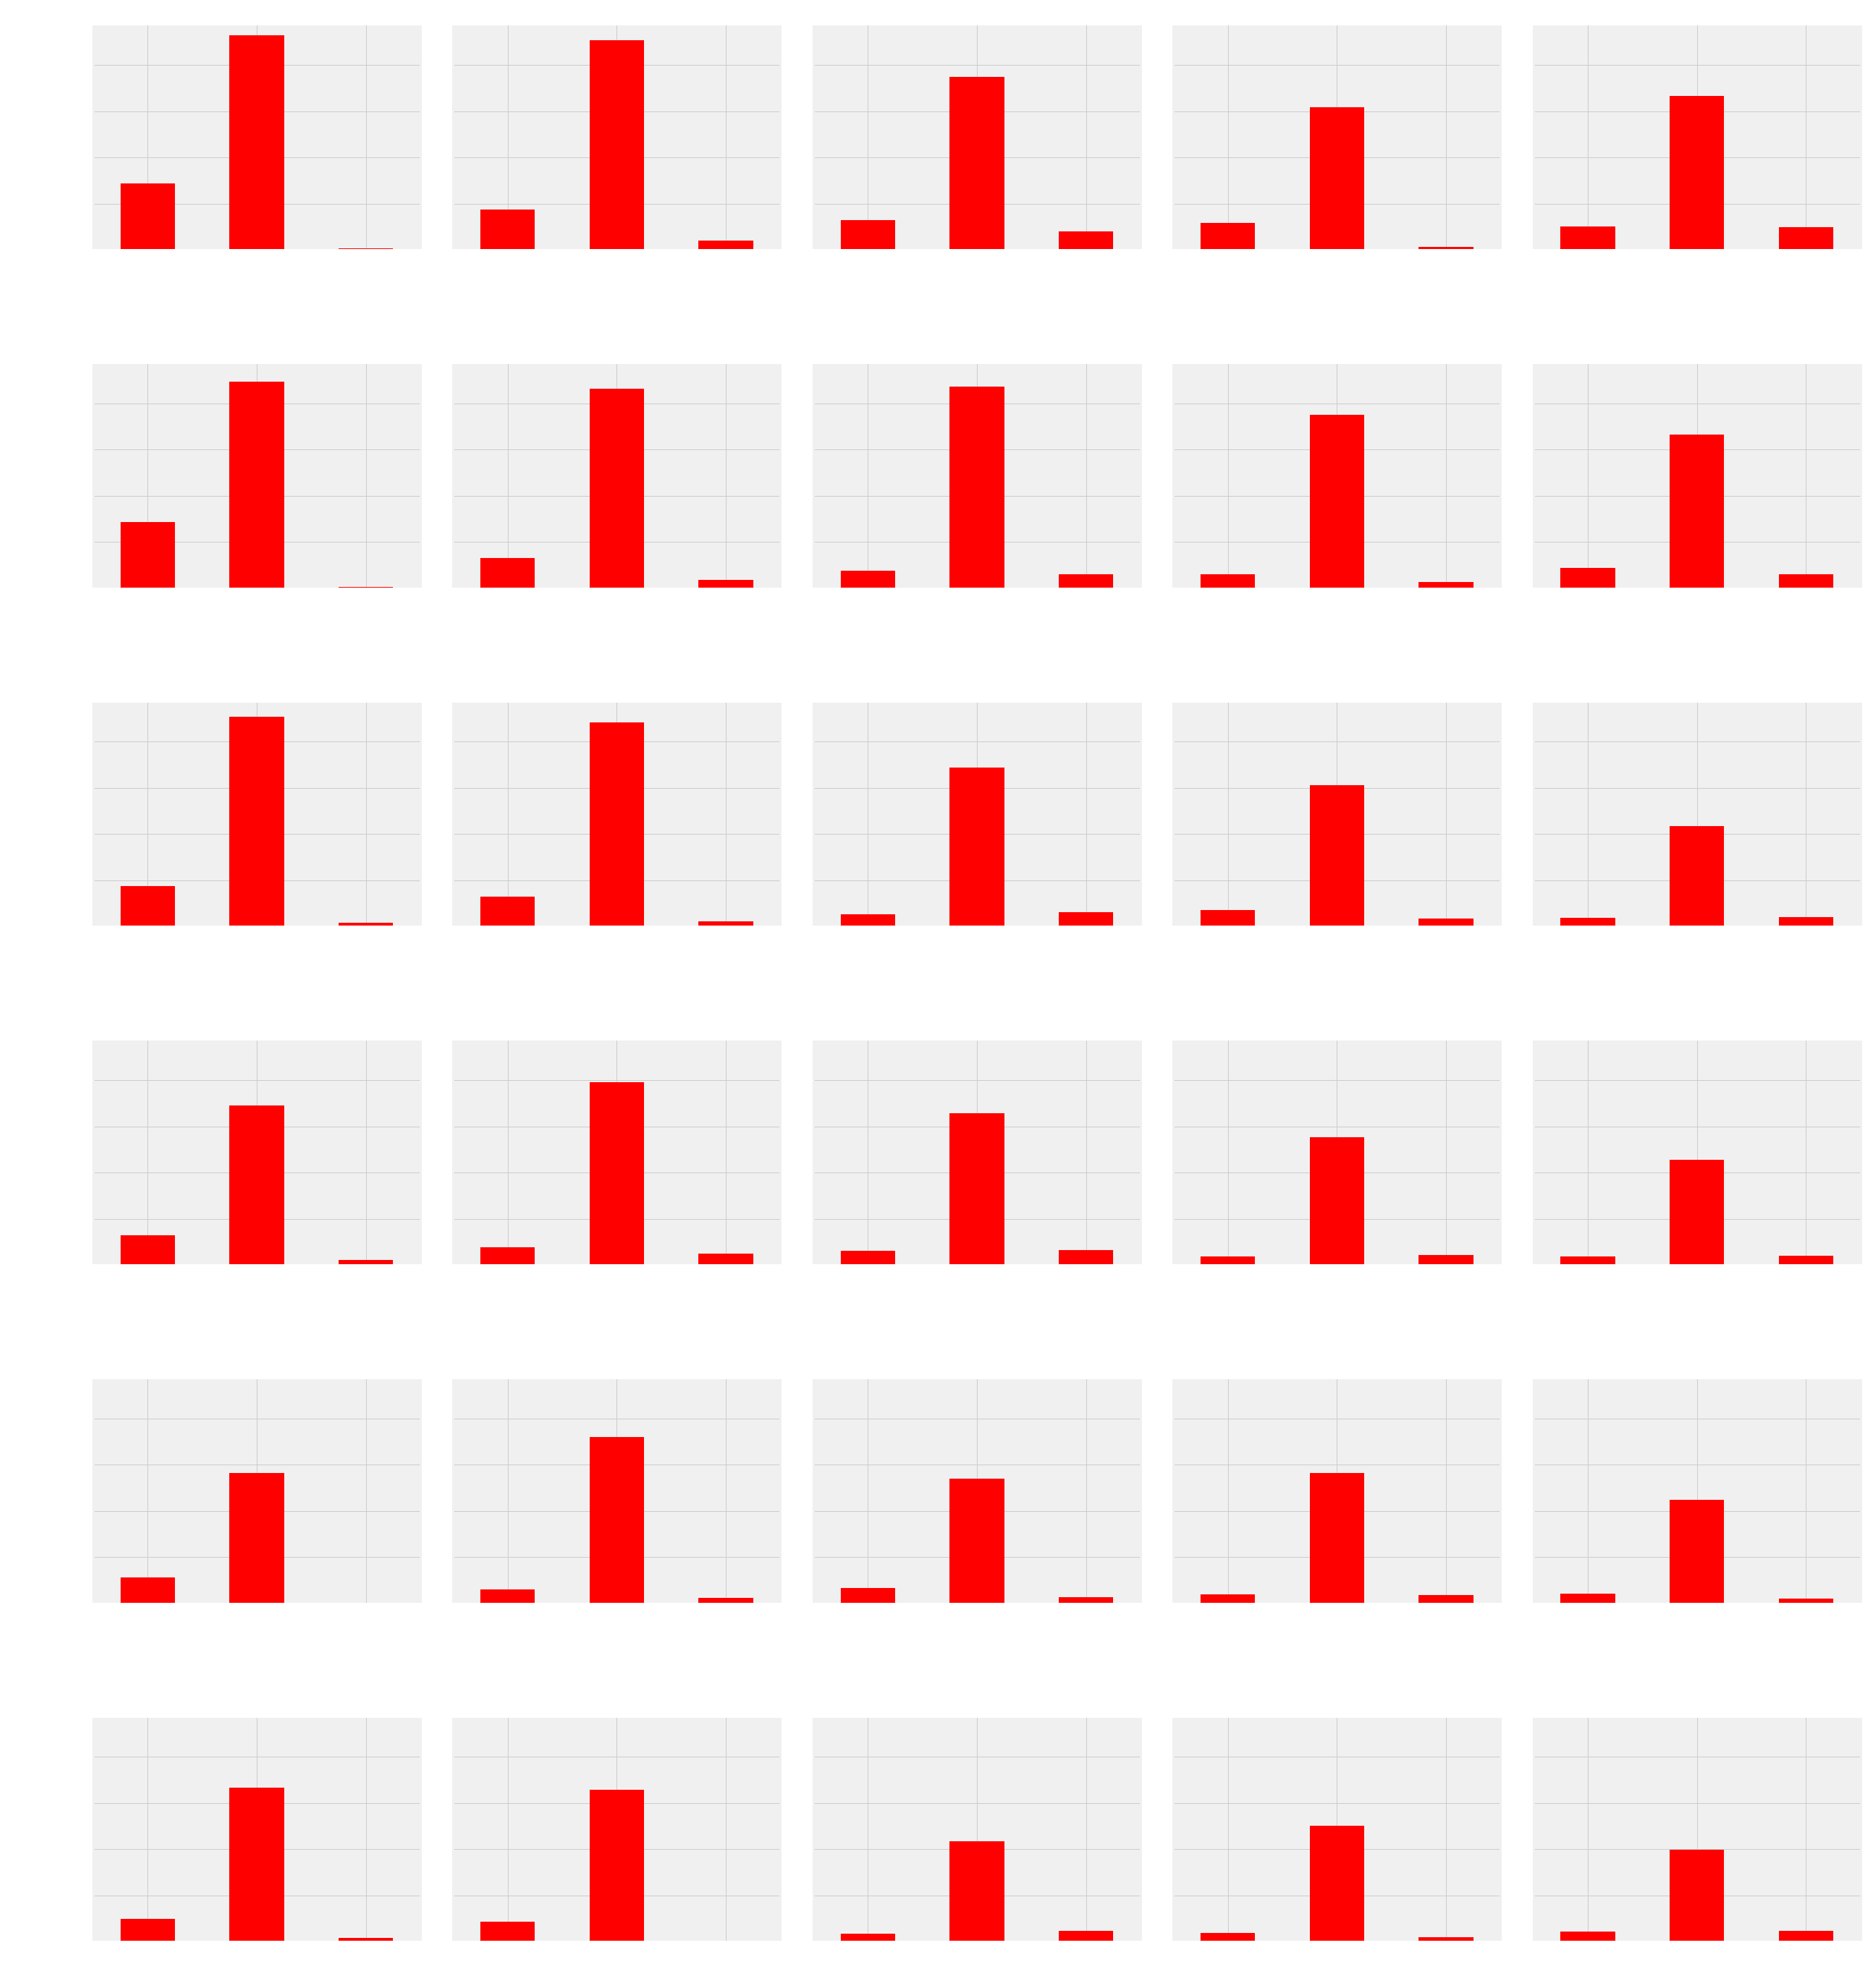

In [31]:
COLOR = 'white'
mp.rcParams['text.color'] = COLOR

font = {'size' : 28}
mp.rc('font', **font)

nrows, ncols = 6, 5
cities = clean_created_df['from'].unique()

fig, axes = mp.subplots(nrows=nrows, ncols=ncols, figsize=(40, 50), sharey=True)
a_row, a_col = 0, 0
mp.subplots_adjust(wspace=0.1, hspace=0.5)

for i in range(len(cities)):
    for j in range(len(cities)):
        if i == j:
            continue

        ax = axes[a_row][a_col]
        clean_stops_group[cities[i]][cities[j]].plot(kind='bar', color='red', ax= ax)
        ax.set_title(cities[j], fontstyle='italic', fontsize=28)
        ax.set_ylabel(cities[i], fontstyle='italic', fontsize=28)
        ax.xaxis.label.set_color('white')
        ax.yaxis.label.set_color('white')

        ax.spines['bottom'].set_color('white')
        ax.spines['top'].set_color('white')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        
        a_col += 1

    a_row += 1
    a_col = 0


1 seems to be very common

## Stops based on airlines

In [32]:
clean_created_df['airline'].value_counts()

Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: airline, dtype: int64

In [51]:
# clean_airline_group = clean_created_df.groupby(['airline', 'stops']).count()['ch_code']
clean_airline_group

airline    stops
Air India  0          6409
           1         71006
           2          3479
AirAsia    0          2434
           1         11418
           2          2246
GO FIRST   0          3223
           1         19547
           2           407
Indigo     0         11216
           1         31166
           2           738
SpiceJet   0          2462
           1          6549
StarAir    0            40
           1            21
Trujet     1            41
Vistara    0         10260
           1        111181
           2          6418
Name: ch_code, dtype: int64

In [49]:
clean_airline_group['SpiceJet'][2] = 0
    
clean_airline_group['StarAir'][2] = 0

clean_airline_group['Trujet'][0] = 0
clean_airline_group['Trujet'][2] = 0

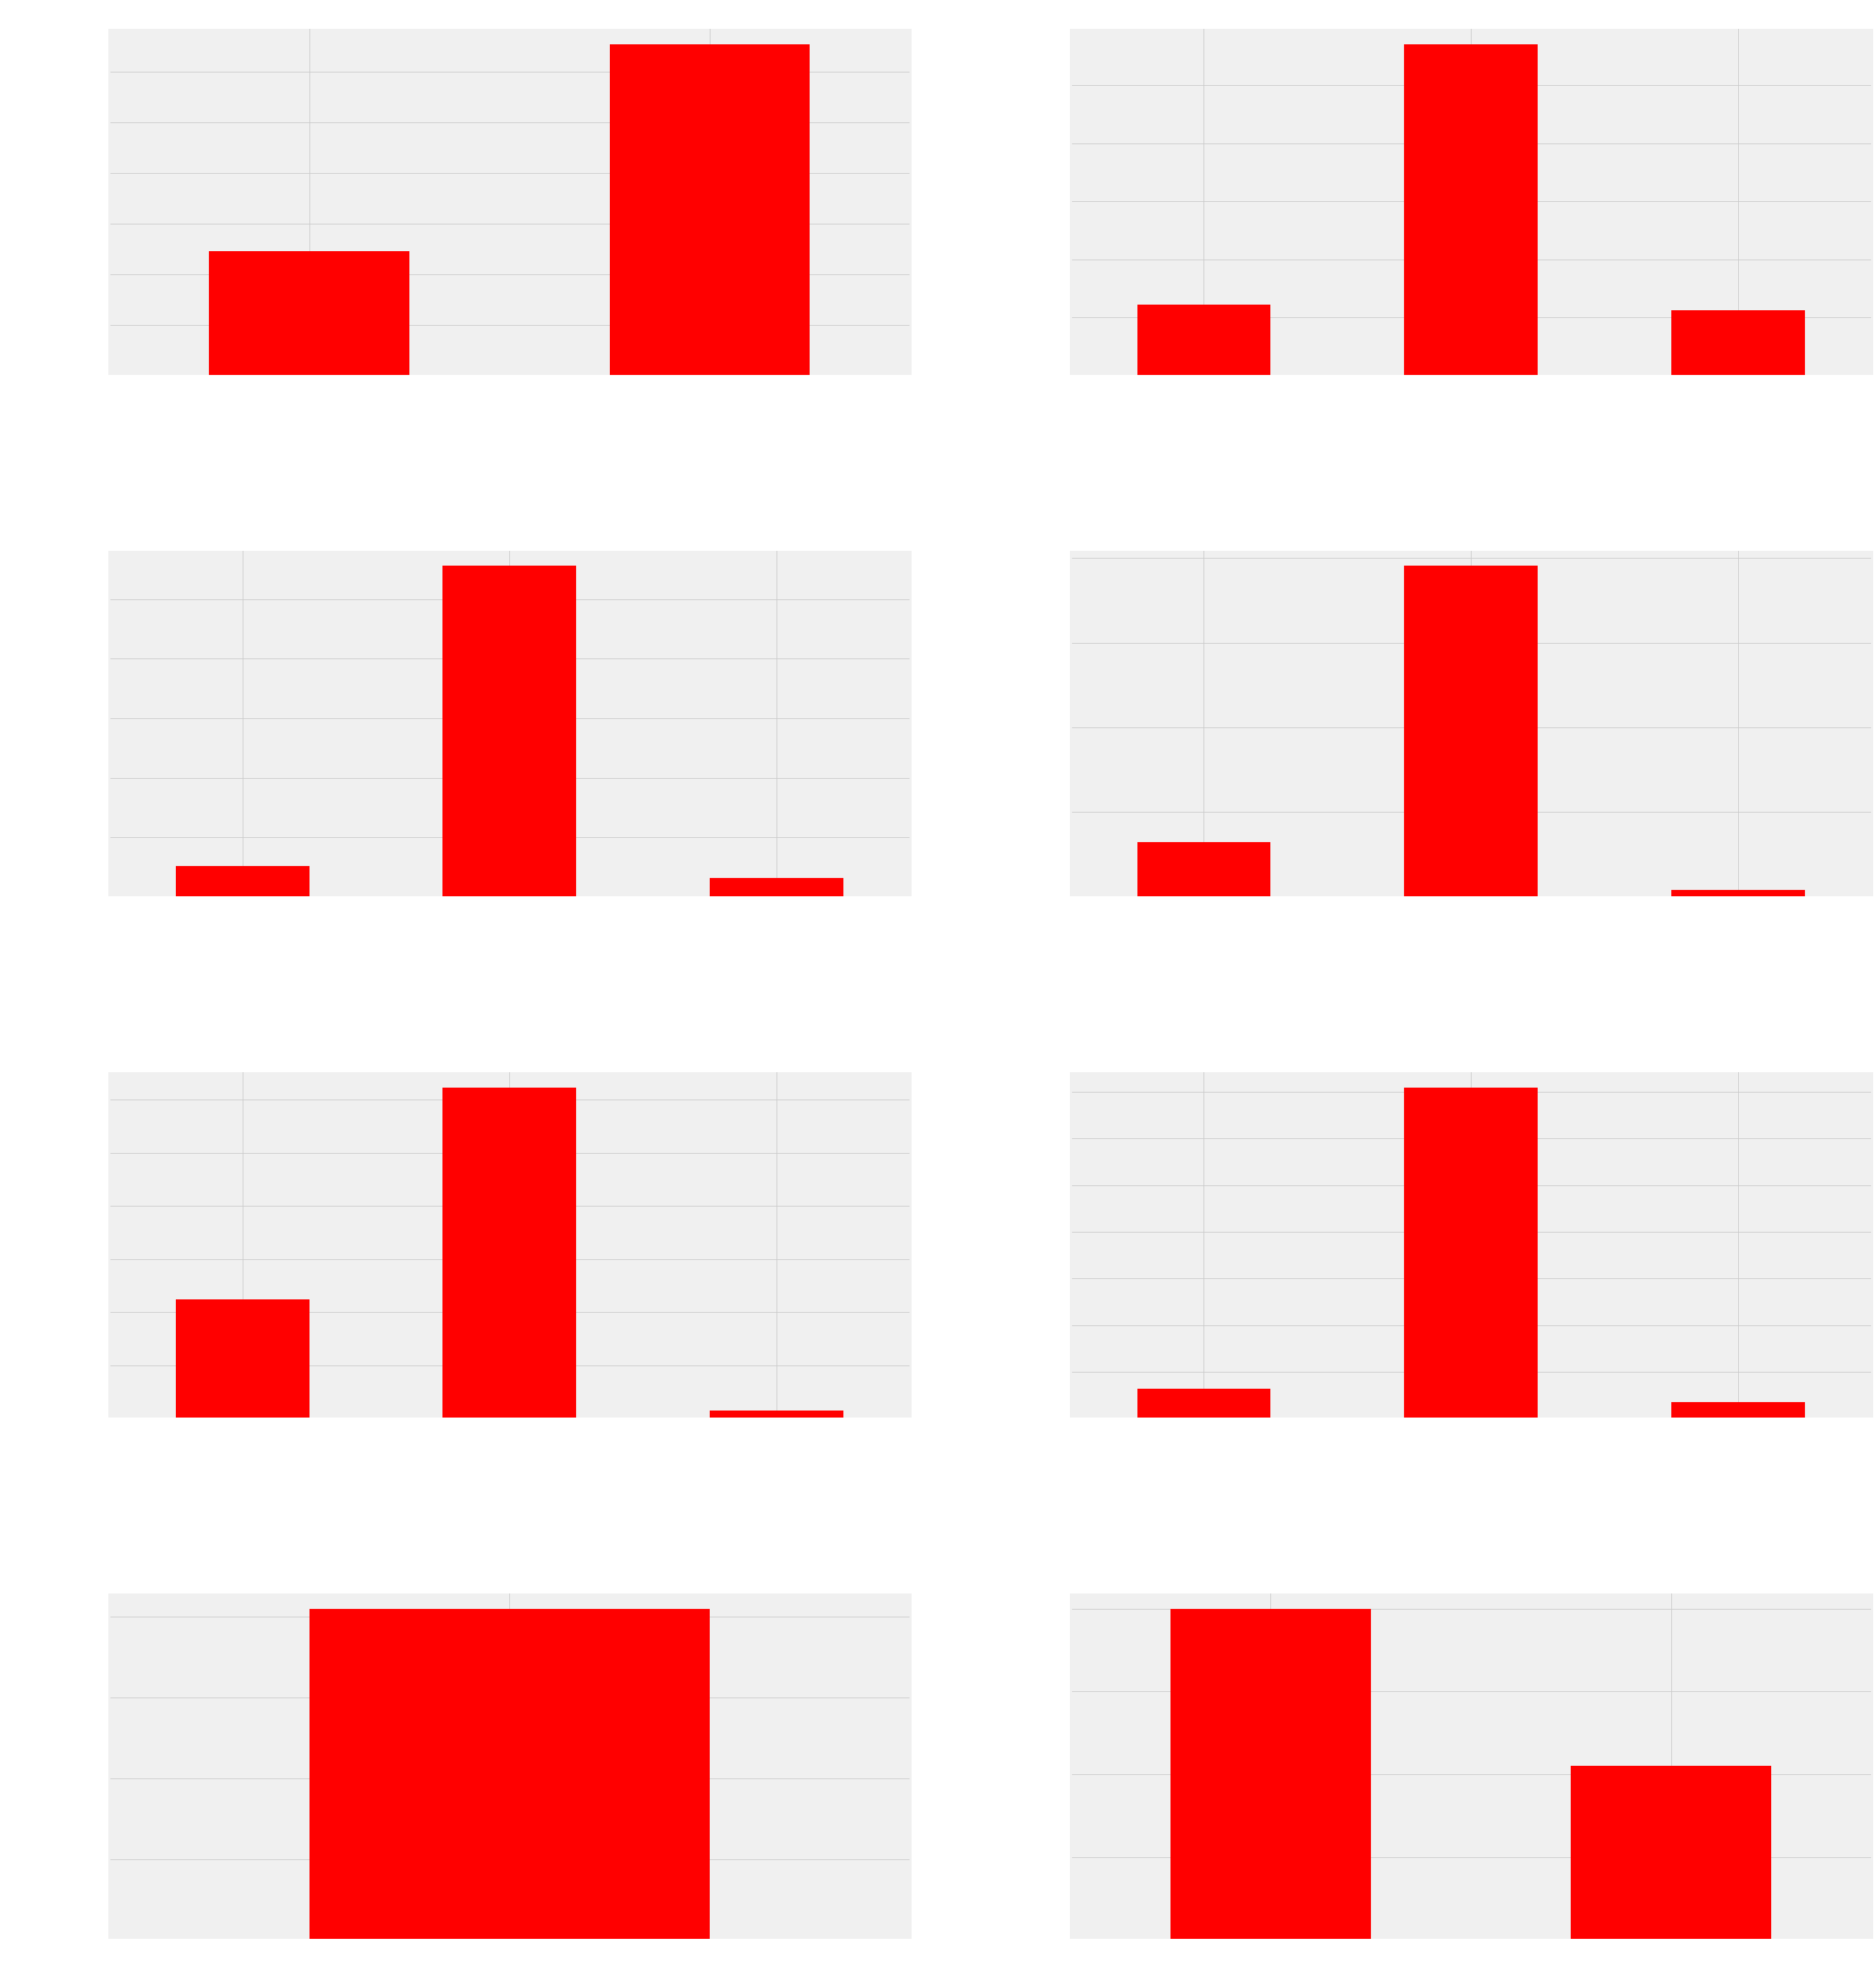

In [50]:
COLOR = 'white'
mp.rcParams['text.color'] = COLOR

font = {'size' : 28}
mp.rc('font', **font)

nrows, ncols = 4, 2
airline = clean_created_df['airline'].unique()

fig, axes = mp.subplots(nrows=nrows, ncols=ncols, figsize=(40, 50))
a_row, a_col = 0, 0
mp.subplots_adjust(wspace=0.2, hspace=0.5)

ctr = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]
        clean_airline_group[airline[ctr]].plot(kind='bar', color='red', ax= ax)
        ax.set_title(airline[ctr], fontstyle='italic', fontsize=34)
        ax.set_ylabel("Count", fontstyle='italic', fontsize=34)
        ax.set_xlabel("Number of Stops", fontstyle='italic', fontsize=34)
        ax.xaxis.label.set_color('white')
        ax.yaxis.label.set_color('white')

        ax.spines['bottom'].set_color('white')
        ax.spines['top'].set_color('white')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        
        ctr += 1
